In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Chp3.xlsx", sheet_name="Sheet1")
df.head(5)
#loads data into pandas data frame

,AircraftNo,ModelCode,CharterID,CharterDate,Pilot,Copilot,Destination,Distance,Hours,Delay,Gallons,Quarts,CustCode,Manufacturer
0,2778V,PA31-350,10231,2018-04-04,109,NaN,ATL,1011,5.5,3.6,243.6,1,10011,Piper
1,2289L,C-90A,9685,2016-01-26,109,NaN,MOB,895,4.6,0.0,302.9,0,10011,Beechcraft
2,4278Y,PA31-350,9582,2015-08-21,109,NaN,MOB,842,4.4,6.1,187.9,1,10010,Piper
3,1484P,PA23-250,9856,2016-09-16,101,NaN,BNA,352,1.9,5.3,NaN,1,10012,Piper
4,2778V,PA31-350,9476,2015-03-18,106,101.0,TYS,668,4.2,3.8,153,0,10019,Piper


In [3]:
print (len(df))
#displays first x rows

982


In [4]:
df['Gallons'] = pd.to_numeric(df['Gallons'], errors='coerce')
#converts gallons to floats, any errors it sets to NaNs

In [5]:
df.drop(df[(df["Gallons"] < 0.00)].index , inplace = True)
#Drops from gallons any thing too big or too small
print (len(df))

981


In [6]:
df.drop(df[(df["Gallons"]>9999)].index , inplace = True)
print (len(df))

979


In [7]:
df.drop_duplicates(keep=False, subset = ['CharterID'], inplace = True) 
#drops duplicates
print (len(df))
#drops any gallons less than 0 or above 99999, inplace makes the changes to df

#drops all the rows with NaN values

741


In [8]:
nd = df.dropna(subset=['Gallons'])
print (len(nd))
writer = pd.ExcelWriter('output.xlsx', date_format = 'dd-mmm-yy', datetime_format='dd-mmm-yy')
nd.to_excel(writer, sheet_name='Sheet1')
writer.save()
#outputs to excel

731


PermissionError: [Errno 13] Permission denied: 'output.xlsx'

In [ ]:
colAircraft = ["AircraftNo" , nd['AircraftNo'].nunique()]
print ("Amount of unique aircraft numbers : " + str(colAircraft[1]))
colManufacturer = ["Manufacturer" , nd['Manufacturer'].nunique()]
print ("Amount of unique Manufacturers : " + str(colManufacturer[1]))
colModelCode = ["ModelCode" , nd['ModelCode'].nunique()]
print ("Amount of unique ModelCodes is : " + str(colModelCode[1]))
arr = [colAircraft, colManufacturer, colModelCode]
sortedArr = sorted(arr,key=lambda x: x[1])
#simply sorts the array based on the 2nddimension, ie the count of uniques

In [ ]:
print ("Concept hierarchy is as follows : ")
print (sortedArr[0])
print("------v-----")
print(sortedArr[1])
print("------v-----")
print(sortedArr[2])

In [ ]:
print (nd['Gallons'].max())
print (nd['Gallons'].max()/30)      

0 30 60 90 120 150 180 210 240 270 300 330 360 390 420 450 480 510 540 570 600


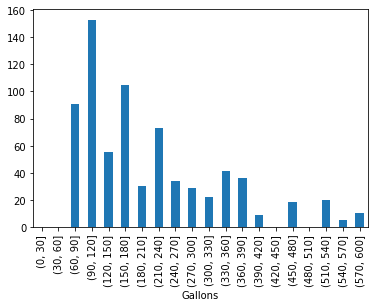

In [41]:
bin = []
for x in range (0, int((nd['Gallons'].max())/30)+2):
    bin.append(x*30)
print (*bin)
s = nd.groupby(pd.cut(nd['Gallons'], bins=bin)).size()
s.plot.bar()


In [ ]:
print ("                                                             | "+str(bin[0]) + " ------------------> " + str(bin[-1]) + " |    ")
for x in range(0, int(len(bin)-4) , 4):
    #this loop prints out our ranges for our 2nd tier, I chose bins that contain 4 elements but you can change and adapt as you wish.
    if (bin[x+3] <100):
        #this check is done cause the numbers with 0's take up an additional space and ruin formatting, this check makes everything align nicely :)
        print ("|          ("+str(bin[x]) +" -> "+ str(bin[x+4]) +" ]           |" , end ='')
    else:
         print ("|             ("+str(bin[x]) +" -> "+ str(bin[x+4]) +" ]             |" , end ='')
print (" ")

for x in range (0 , int(len(bin)-1)):
    if (x %4 ==0):
        print ("|" , end ='')
    print ("(" +str(bin[x]) + " ," + str(bin[x+1])+ "]" , end ='')
    
 #this method hear prints out the hierarchy, based on equal width partioning    

In [9]:
sorted_Gal_DF = nd.sort_values(by=['Gallons'])
sorted_Gal_DF.head()
#this is simply our data frame sorted on gallon values.

,AircraftNo,ModelCode,CharterID,CharterDate,Pilot,Copilot,Destination,Distance,Hours,Delay,Gallons,Quarts,CustCode,Manufacturer
592,1484P,PA23-250,9679,2016-01-15,106,104.0,MQY,302,1.8,0.0,60.4,2,10019,Piper
287,1484P,PA23-250,10089,2015-09-10,106,104.0,MQY,302,1.8,0.0,60.4,2,10019,Piper
651,1484P,PA23-250,9428,2015-01-07,106,104.0,MQY,302,1.8,0.0,60.4,2,10019,Piper
793,1484P,PA23-250,9989,2015-04-07,106,104.0,MQY,302,1.8,0.0,60.4,2,10019,Piper
223,1484P,PA23-250,9524,2015-05-27,106,104.0,MQY,302,1.8,0.0,60.4,2,10019,Piper


In [10]:
size = 75
number = int(len(sorted_Gal_DF)/size)
#number is how many partitions we want
frames = [sorted_Gal_DF.iloc[i*size:(i+1)*size].copy() for i in range(number+1)]
print (len(frames))
frames[0].head()
#I think this is a very cool method, it simply takes the size of each bin and takes all the data and creates an array that holds dataFrames,
#so each position in the frames array is a dataframe containing 75 values (besides the last frame)

10


,AircraftNo,ModelCode,CharterID,CharterDate,Pilot,Copilot,Destination,Distance,Hours,Delay,Gallons,Quarts,CustCode,Manufacturer
592,1484P,PA23-250,9679,2016-01-15,106,104.0,MQY,302,1.8,0.0,60.4,2,10019,Piper
287,1484P,PA23-250,10089,2015-09-10,106,104.0,MQY,302,1.8,0.0,60.4,2,10019,Piper
651,1484P,PA23-250,9428,2015-01-07,106,104.0,MQY,302,1.8,0.0,60.4,2,10019,Piper
793,1484P,PA23-250,9989,2015-04-07,106,104.0,MQY,302,1.8,0.0,60.4,2,10019,Piper
223,1484P,PA23-250,9524,2015-05-27,106,104.0,MQY,302,1.8,0.0,60.4,2,10019,Piper


In [11]:
print ("                                      |" + str(frames[0].iloc[0]['Gallons']) + "            ->        " + str(frames[-1].iloc[-1]['Gallons']) + "|")
#-1 is the last ele in array , so we going from our 1st dataframe selecting the first gallon value and then going to last data frame and selecting last gallons value
checker =1

for y in range (0,len(frames),3):
             if (y==len(frames)-1):
                print(str(frames[y].iloc[0]['Gallons']) +" -> " +str(frames[y].iloc[-1]['Gallons']) + " |"  , end = '')
             else:    
                print ("              |"+str(frames[y].iloc[0]['Gallons'])+" " , end = '')
                print ("->" + str(frames[y+2].iloc[-1]['Gallons'])+" |        " , end = '')    
            
print (" ")    
for x in range(0,len(frames)):
    print("|"+str(frames[x].iloc[0]['Gallons']) +" -> " +str(frames[x].iloc[-1]['Gallons']) + " |"  , end = '')
    

                                      |60.4            ->        575.7|
              |60.4 ->116.4 |                      |116.4 ->215.1 |                      |215.1 ->397.7 |        397.7 -> 575.7 | 
|60.4 -> 85.2 ||85.2 -> 104.7 ||105.5 -> 116.4 ||116.4 -> 153.0 ||153.0 -> 169.0 ||169.0 -> 215.1 ||215.1 -> 243.7 ||243.7 -> 336.4 ||336.4 -> 397.7 ||397.7 -> 575.7 |

In [12]:
size = 87
number = int(len(sorted_Gal_DF)/size)
#number is how many partitions we want
frames_Smoothed = [sorted_Gal_DF.iloc[i*size:(i+1)*size].copy() for i in range(number+1)]
print (len(frames_Smoothed))
means = []
for x in range (len(frames_Smoothed)):
    mean = frames_Smoothed[x]["Gallons"].mean()
    frames_Smoothed[x]["Gallons"] = mean
    print("%.2f" % round(mean,2))
frames_Smoothed[0].head()

9
71.26
100.01
116.16
147.71
177.01
225.06
293.14
387.97
538.37


,AircraftNo,ModelCode,CharterID,CharterDate,Pilot,Copilot,Destination,Distance,Hours,Delay,Gallons,Quarts,CustCode,Manufacturer
592,1484P,PA23-250,9679,2016-01-15,106,104.0,MQY,302,1.8,0.0,71.25977,2,10019,Piper
287,1484P,PA23-250,10089,2015-09-10,106,104.0,MQY,302,1.8,0.0,71.25977,2,10019,Piper
651,1484P,PA23-250,9428,2015-01-07,106,104.0,MQY,302,1.8,0.0,71.25977,2,10019,Piper
793,1484P,PA23-250,9989,2015-04-07,106,104.0,MQY,302,1.8,0.0,71.25977,2,10019,Piper
223,1484P,PA23-250,9524,2015-05-27,106,104.0,MQY,302,1.8,0.0,71.25977,2,10019,Piper


In [13]:
appended_data = pd.concat(frames_Smoothed)
appended_data.head()

,AircraftNo,ModelCode,CharterID,CharterDate,Pilot,Copilot,Destination,Distance,Hours,Delay,Gallons,Quarts,CustCode,Manufacturer
592,1484P,PA23-250,9679,2016-01-15,106,104.0,MQY,302,1.8,0.0,71.25977,2,10019,Piper
287,1484P,PA23-250,10089,2015-09-10,106,104.0,MQY,302,1.8,0.0,71.25977,2,10019,Piper
651,1484P,PA23-250,9428,2015-01-07,106,104.0,MQY,302,1.8,0.0,71.25977,2,10019,Piper
793,1484P,PA23-250,9989,2015-04-07,106,104.0,MQY,302,1.8,0.0,71.25977,2,10019,Piper
223,1484P,PA23-250,9524,2015-05-27,106,104.0,MQY,302,1.8,0.0,71.25977,2,10019,Piper


In [14]:
writer2 = pd.ExcelWriter('SmoothedOut.xlsx', date_format = 'dd-mmm-yy', datetime_format='dd-mmm-yy')
appended_data.to_excel(writer2, sheet_name='Sheet1')
writer2.save()

PermissionError: [Errno 13] Permission denied: 'SmoothedOut.xlsx'

In [17]:
values = nd['Gallons'].tolist()
print (max(values))
print (min(values))

575.7
60.4


In [21]:
ina = float(input())
print (str((ina - min(values)) / (max(values) - min(values))))

 156.2


0.18591111973607602


In [40]:
standard = (round(np.std(values),2))
meant = (round(np.mean(values),2))
print (standard)
print(meant)
zNormal = (156.2-np.mean(values))/np.std(values)
print (zNormal)

124.61
206.48
-0.40351578015093376
